In [10]:
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import os
from tensorflow.keras.models import save_model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
json_path = "C:/Users/ismai/OneDrive/Masaüstü/data/features_2.0_sec.json"

with open(json_path, "r") as fp:
    data = json.load(fp)

X = np.array(data["mfcc"])
y = np.array(data["genre_num"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


X_train: (5592, 130, 13), y_train: (5592,)
X_val: (1398, 130, 13), y_val: (1398,)
X_test: (2996, 130, 13), y_test: (2996,)


In [3]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, activation='tanh', input_shape=(X.shape[1], X.shape[2]), return_sequences=False))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(10, activation='softmax'))

model_rnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model_rnn.summary()


C:\Users\ismai\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,082 (105.79 KB)

 Trainable params: 27,082 (105.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

hist_rnn = model_rnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=250,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/250
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1122 - loss: 2.7391 - val_accuracy: 0.1488 - val_loss: 2.2947
Epoch 2/250
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1371 - loss: 2.5081 - val_accuracy: 0.1788 - val_loss: 2.2332
Epoch 3/250
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1537 - loss: 2.3844 - val_accuracy: 0.2060 - val_loss: 2.1988
Epoch 4/250
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1658 - loss: 2.3159 - val_accuracy: 0.2296 - val_loss: 2.1698
Epoch 5/250
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1744 - loss: 2.2637 - val_accuracy: 0.2353 - val_loss: 2.1506
Epoch 6/250
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1723 - loss: 2.2574 - val_accuracy: 0.2418 - val_loss: 2.1349
Epoch 7/250
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2070 - loss: 2.1872 - val_accuracy: 0.2482 - val_loss: 2.1171
Epoch 8/250
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2011 - loss: 2.1937 - val_accuracy: 0.

In [6]:
loss_rnn, acc_rnn = model_rnn.evaluate(X_test, y_test)
print(f"Test Loss: {loss_rnn}")
print(f"Test Accuracy: {acc_rnn}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3977 - loss: 1.6636
Test Loss: 1.6324107646942139
Test Accuracy: 0.4075433909893036


In [7]:
def plot_history(hist):
    fig, axs = plt.subplots(2, 1, figsize=(8, 7))
    fig.tight_layout(pad=3)

    axs[0].plot(hist.history["accuracy"], c='navy', label="Training Accuracy")
    axs[0].plot(hist.history["val_accuracy"], c='orange', label="Validation Accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Model Accuracy")

    axs[1].plot(hist.history["loss"], c='navy', label="Training Loss")
    axs[1].plot(hist.history["val_loss"], c='orange', label="Validation Loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epochs")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Model Loss")

    plt.show()

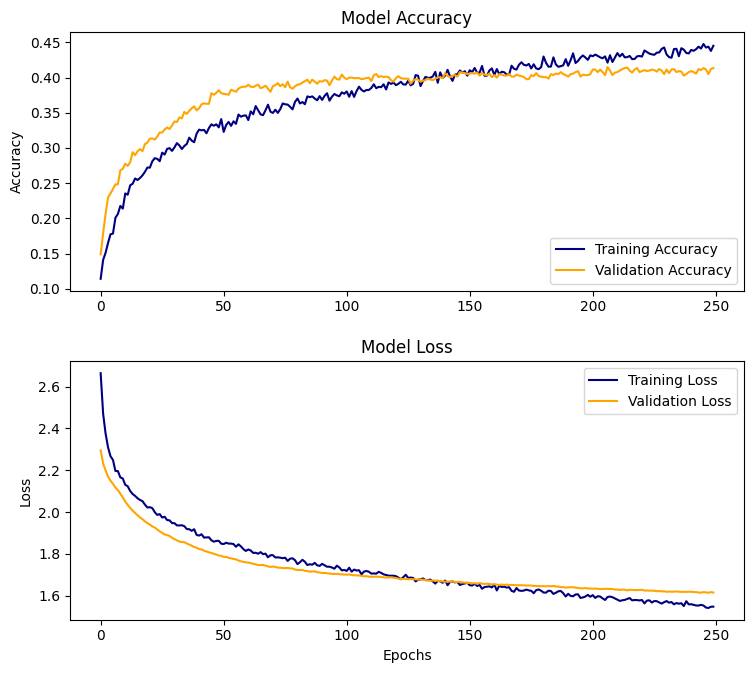

In [8]:
plot_history(hist_rnn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

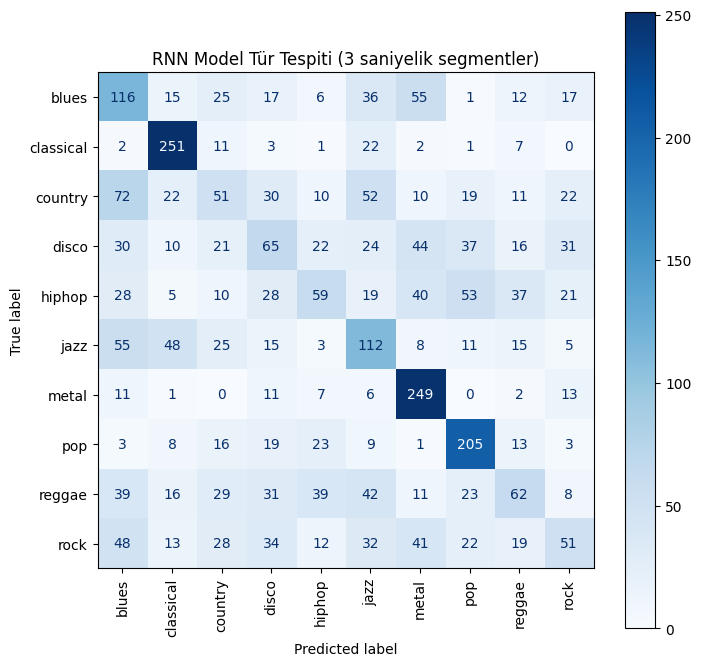

In [9]:
def make_prediction(model, X):
    global genres
    preds_num = []
    preds_name = []

    for X_current in X:
        X_current = X_current[np.newaxis, ...]
        pred = model.predict(X_current)
        pred = np.argmax(pred, axis=1)
        preds_num.append(pred[0])
        preds_name.append(genres[pred[0]])

    return preds_num, preds_name

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

preds_num, preds_name = make_prediction(model_rnn, X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, preds_num)

fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.title('RNN Model Tür Tespiti (3 saniyelik segmentler)')
plt.show()


In [15]:
# Eğer not defterin zaten models/ klasörünün içindeyse
model_path = "model_rnn.h5"  # sadece dosya adı

model_rnn.save(model_path)
print(f"Model şu konuma kaydedildi: models/{model_path}")


# Modeli kaydeder
save_model(model_rnn, model_path)

print(f"RNN modeli başarıyla kaydedildi: {model_path}")

Model şu konuma kaydedildi: models/model_rnn.h5
RNN modeli başarıyla kaydedildi: model_rnn.h5
